In [64]:
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
import random
import numpy as np
from matplotlib import pyplot as plt

from os import X_OK
from numpy.random.mtrand import rand
X = np.linspace(-5 , 5 ,2000).reshape(-1,1)
y = lambda x : -2*x  + 5 + np.random.rand()*0.7

m=len(X)
m


2000

In [66]:
Y = y(X).reshape(-1,1)
Y

array([[15.6617347 ],
       [15.6517297 ],
       [15.6417247 ],
       ...,
       [-4.31825529],
       [-4.32826029],
       [-4.3382653 ]])

In [67]:
theta_0 = 0
theta_1 = 0

In [68]:
h_x = theta_0 + theta_1 * X  ## y_predict
print("h(x):", h_x)

h(x): [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [69]:
Error = h_x - Y
print("Error Vector:\n",Error)
M = len(X)
j = 1 / (2*M) * sum(Error**2)
print("j:", j)

Error Vector:
 [[-15.6617347 ]
 [-15.6517297 ]
 [-15.6417247 ]
 ...
 [  4.31825529]
 [  4.32826029]
 [  4.3382653 ]]
j: [32.7109616]


In [70]:
class Particale :
    def __init__(self,varSize , bounds , J,):
        self.position = np.random.uniform(bounds[:,0],bounds[:,1]).reshape(varSize)
        self.cost = J(self.position)
        self.velosity = np.zeros(varSize)
        self.bestCost = self.cost
        self.bestPosition = self.position


class GlobalParticale:
    def __init__(self):
        self.GCost = float('inf')
        self.Gposition = []


In [71]:
J = lambda x: sum(((x[1]*X + x[0])-Y) ** 2)/m
h_x = lambda x: x[0]*X + x[1]

In [72]:
nVar =2
varSize = np.array([nVar,1])
varMax = [-5,-10]
varMin = [10,8]
bounds = np.column_stack((varMin,varMax))

0 [[ 6.87750991]
 [-1.6240524 ]]
1 [[ 5.46988882]
 [-2.00342364]]
2 [[ 5.46988882]
 [-2.00342364]]
3 [[ 5.46988882]
 [-2.00342364]]
4 [[ 5.46988882]
 [-2.00342364]]
5 [[ 5.62930429]
 [-2.03632659]]
6 [[ 5.62930429]
 [-2.03632659]]
7 [[ 5.62930429]
 [-2.03632659]]
8 [[ 5.62930429]
 [-2.03632659]]
9 [[ 5.62930429]
 [-2.03632659]]
10 [[ 5.62930429]
 [-2.03632659]]
11 [[ 5.68897569]
 [-1.9886287 ]]
12 [[ 5.68897569]
 [-1.9886287 ]]
13 [[ 5.68897569]
 [-1.9886287 ]]
14 [[ 5.68897569]
 [-1.9886287 ]]
15 [[ 5.68897569]
 [-1.9886287 ]]
16 [[ 5.68897569]
 [-1.9886287 ]]
17 [[ 5.68897569]
 [-1.9886287 ]]
18 [[ 5.68897569]
 [-1.9886287 ]]
19 [[ 5.68897569]
 [-1.9886287 ]]
20 [[ 5.68897569]
 [-1.9886287 ]]
21 [[ 5.68897569]
 [-1.9886287 ]]
22 [[ 5.68897569]
 [-1.9886287 ]]
23 [[ 5.68897569]
 [-1.9886287 ]]
24 [[ 5.68897569]
 [-1.9886287 ]]
25 [[ 5.68897569]
 [-1.9886287 ]]
26 [[ 5.68897569]
 [-1.9886287 ]]
27 [[ 5.68897569]
 [-1.9886287 ]]
28 [[ 5.68897569]
 [-1.9886287 ]]
29 [[ 5.68897569]
 [-1.9

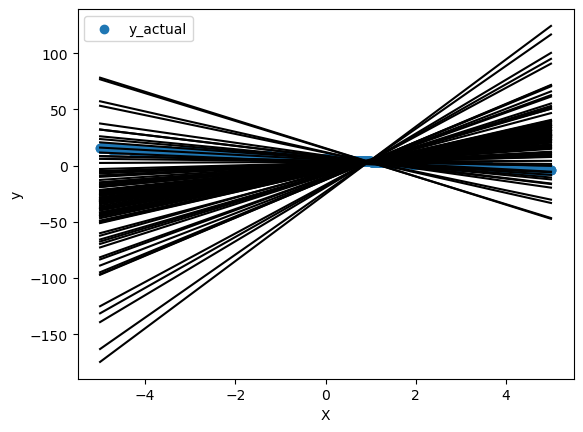

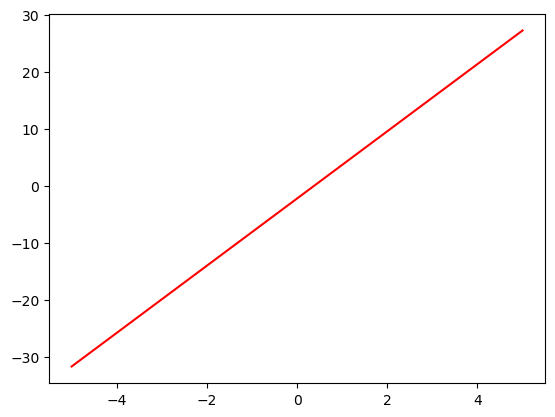

In [73]:

w=1
c1 = 2
c2 = 2
nPop = 50
MaxIT = 100
damp = 0.8


# Initialization

particales = [None]*nPop
GlobalBest = GlobalParticale()
for i in range(nPop):
    particales[i] = Particale(varSize , bounds , J) 

    if (particales[i].cost < GlobalBest.GCost ).any():
        GlobalBest.GCost = particales[i].cost
        GlobalBest.Gposition = particales[i].position

plt.scatter(X,Y,label="y_actual")
for it in range(MaxIT) : 
    for i in range(nPop) :
        particales[i].velosity =damp * w * (particales[i].velosity) + np.random.rand()* c1 * (particales[i].bestPosition -particales[i].position ) \
                                    + np.random.rand()* c2 * (GlobalBest.Gposition - particales[i].position )

        particales[i].position = particales[i].position + particales[i].velosity

        # particales[i].position = np.max(bounds[:,0],particales[i].position)

        particales[i].cost = J(particales[i].position)

        if (particales[i].cost < particales[i].bestPosition).any() :
            particales[i].bestCost= particales[i].cost
            particales[i].bestPosition = particales[i].position

            if  (particales[i].cost < GlobalBest.GCost).any() :
                GlobalBest.GCost = particales[i].cost
                GlobalBest.Gposition = particales[i].position

    print(it , GlobalBest.Gposition)
    h = h_x(particales[i].position)

    plt.plot(X,h ,color='black')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

plt.plot(X,h ,color='red')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


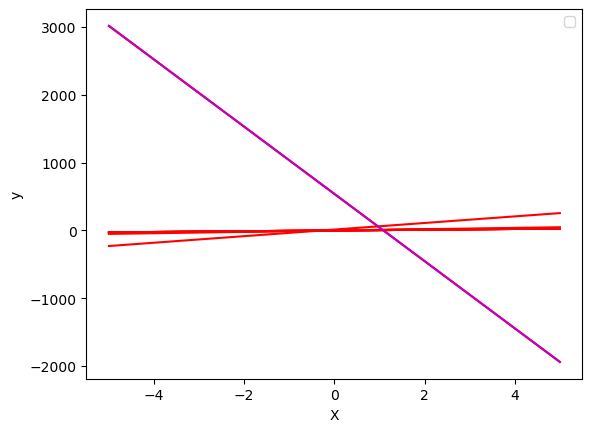

In [74]:
for i in range(10):
    h = h_x(particales[i].position)
    plt.plot(X,h ,color='red')
plt.plot(X,h ,color='m')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [75]:
GlobalBest.GCost

array([9.20466381e-09])